## Exploratory Data Analysis

Uploadinf File

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
df = pd.read_csv(r"C:\Users\dell\Desktop\Data Analyst\Project\Sample_Superstore.csv", encoding="ISO-8859-1")

## Dataset Overview
First 3 Roes


In [2]:
print(df.head(3))

   Row ID        Order ID Order Date   Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
2       3  CA-2016-138688  6/12/2016   6/16/2016  Second Class    DV-13045   

     Customer Name    Segment        Country         City  ... Postal Code  \
0      Claire Gute   Consumer  United States    Henderson  ...       42420   
1      Claire Gute   Consumer  United States    Henderson  ...       42420   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   

   Region       Product ID         Category Sub-Category  \
0   South  FUR-BO-10001798        Furniture    Bookcases   
1   South  FUR-CH-10000454        Furniture       Chairs   
2    West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9

Dataset Columns name

In [3]:

for col in df.columns: print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


Dataset Shape

In [4]:
print(df.shape)
print(df.info())

(9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 1

Summary of numeric cloumns


In [5]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


## Dataset Cleaning

Checking missing values


In [6]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Checking DUplicate Rows

In [7]:
print(df.duplicated().sum())


0


In [8]:
df['Order Date'] =pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print(df["Order Date"])
print(df["Ship Date"])

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]
0      2016-11-11
1      2016-11-11
2      2016-06-16
3      2015-10-18
4      2015-10-18
          ...    
9989   2014-01-23
9990   2017-03-03
9991   2017-03-03
9992   2017-03-03
9993   2017-05-09
Name: Ship Date, Length: 9994, dtype: datetime64[ns]


Data After Cleaning

In [9]:
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


## Univariate Analysis

Orders by Category Distribution 

In [10]:
print("Category Distrinution:\n", df['Category'].value_counts(), "\n")

Category Distrinution:
 Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64 



Visualization 


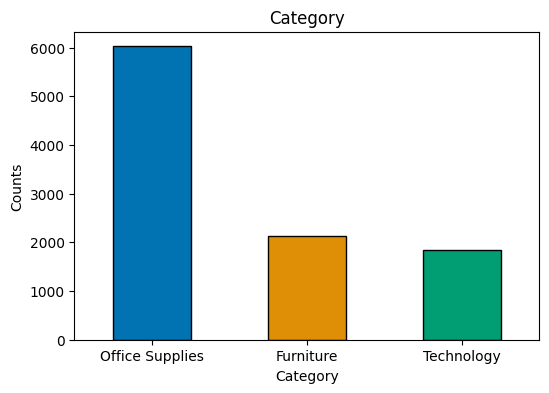

In [11]:
colors_category = sns.color_palette("colorblind") 
plt.figure(figsize=(6,4))
df['Category'].value_counts().plot(kind='bar', color=colors_category[:len(df['Category'].unique())],
edgecolor='black')
plt.title("Category")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()


Orders by Sub Ctegory Distribution

In [12]:
print("Sub Category: \n", df['Sub-Category'].value_counts(), "\n")

Sub Category: 
 Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64 



Visualization

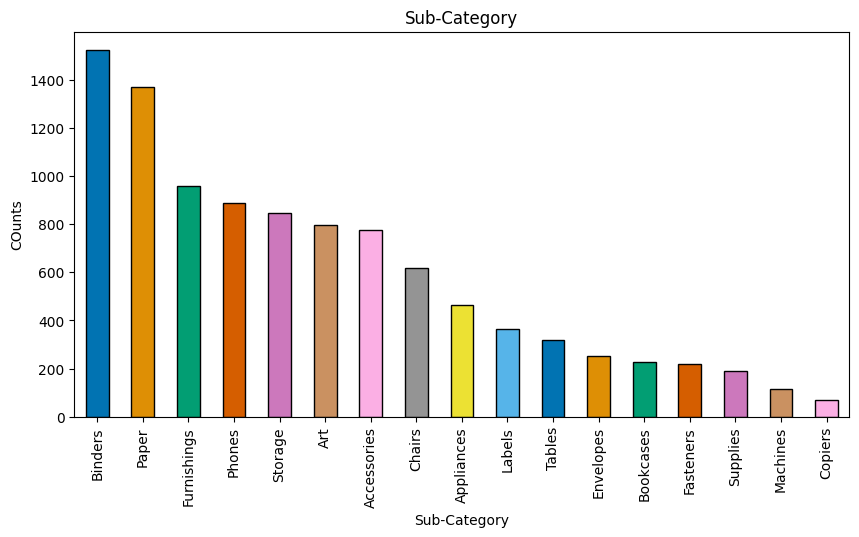

In [13]:
plt.figure(figsize=(10,5))
df['Sub-Category'].value_counts().plot(kind='bar', color=colors_category[:len(df['Sub-Category'].unique())], edgecolor='black')
plt.title('Sub-Category')
plt.xlabel("Sub-Category")
plt.ylabel("COunts")
plt.show()

## Multivariate/Bivariate Analysis

Relationship between Sales and Profit.

In [14]:
print("Correlation B/T Sales & Profit:\n", df['Sales'].corr(df['Profit']))

Correlation B/T Sales & Profit:
 0.4790643497377062


There’s a moderate positive relationship (≈48%) between Sales and Profit. This means generally when sales go up, profit also goes up — but not always, because discounts and expenses also impact profitability.``

Relationship between Discount and profit

In [15]:
print("Correlation B/T Discount & Profit:" , df['Discount'].corr(df['Profit']))

Correlation B/T Discount & Profit: -0.21948745637176803


We found a weak negative correlation (-0.22) between Discounts and Profit. This indicates that higher discounts generally reduce profitability.

Sales by Category

In [16]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Sales by Category: \n" , category_sales)

Sales by Category: 
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


Visualization

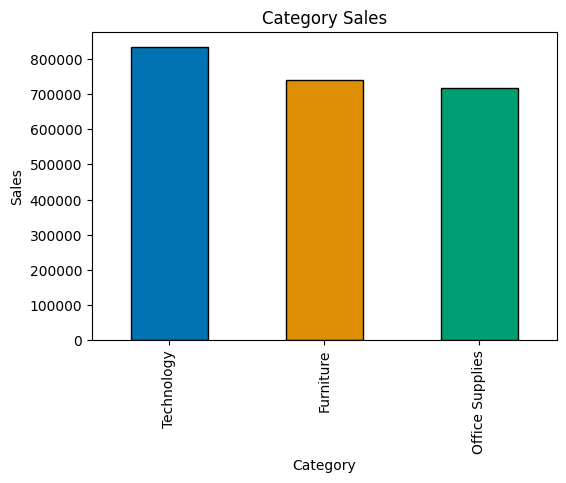

In [17]:
plt.figure(figsize=(6,4))
category_sales.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Category Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

Region VS Sales Profit

In [18]:
region_stats = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by="Sales", ascending=False)
print("Sales & Profit by Region:\n", region_stats)


Sales & Profit by Region:
                Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


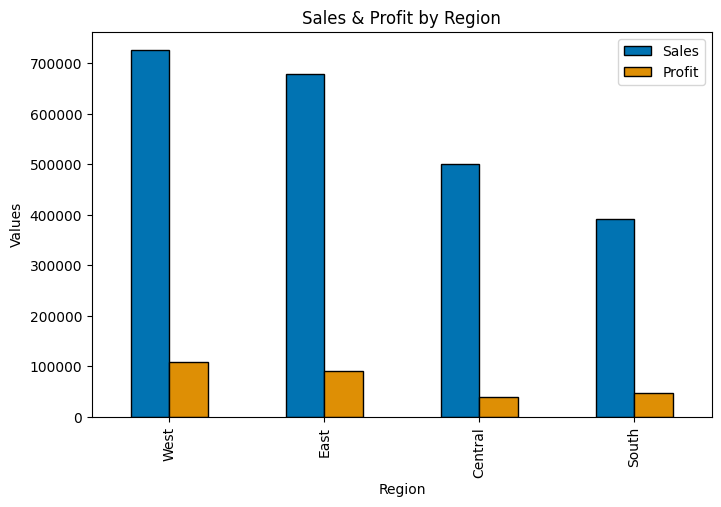

In [19]:
region_stats.plot(kind='bar', figsize=(8,5), color=colors_category[:2], edgecolor='black')

plt.title("Sales & Profit by Region")
plt.xlabel("Region")
plt.ylabel("Values")
plt.legend(["Sales", "Profit"])
plt.show()

Sales By Segment

In [20]:
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

print("Sales by Segment:\n", sales_by_segment)

Sales by Segment:
 Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64


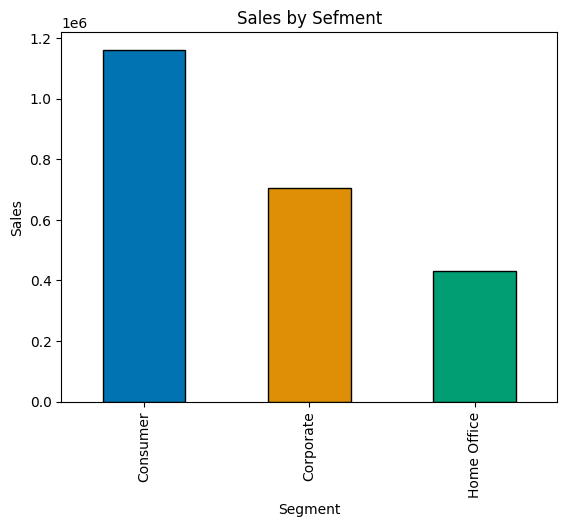

In [21]:
plt.Figure(figsize=(6,4))
sales_by_segment.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Sales by Sefment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()


Sales by Year

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')

sales_by_year = df.groupby('Year')['Sales'].sum()
print("Sales by Year:\n", sales_by_year)


Sales by Year:
 Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


visualization

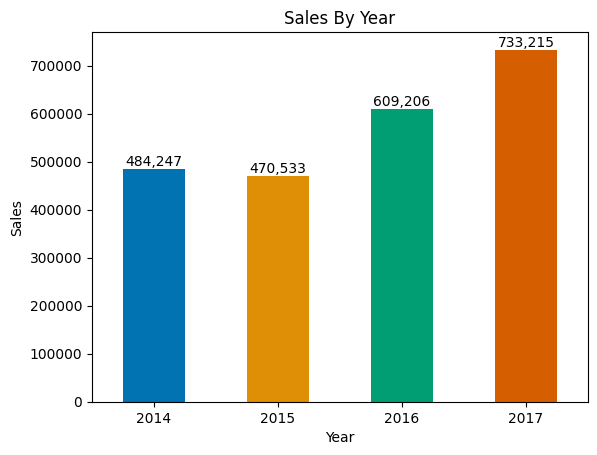

In [23]:
plt.Figure(figsize=(7,5))
ax= sales_by_year.plot(kind='bar', color=colors_category)
plt.title('Sales By Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()

## Profit trends

Profit by Months

In [24]:
profit_by_month = df.groupby('Month')['Profit'].sum()
print("Profit by Month: \n", profit_by_month)

Profit by Month: 
 Month
2014-01     2450.1907
2014-02      862.3084
2014-03      498.7299
2014-04     3488.8352
2014-05     2738.7096
2014-06     4976.5244
2014-07     -841.4826
2014-08     5318.1050
2014-09     8328.0994
2014-10     3448.2573
2014-11     9292.1269
2014-12     8983.5699
2015-01    -3281.0070
2015-02     2813.8508
2015-03     9732.0978
2015-04     4187.4962
2015-05     4667.8690
2015-06     3335.5572
2015-07     3288.6483
2015-08     5355.8084
2015-09     8209.1627
2015-10     2817.3660
2015-11    12474.7884
2015-12     8016.9659
2016-01     2824.8233
2016-02     5004.5795
2016-03     3611.9680
2016-04     2977.8149
2016-05     8662.1464
2016-06     4750.3781
2016-07     4432.8779
2016-08     2062.0693
2016-09     9328.6576
2016-10    16243.1425
2016-11     4011.4075
2016-12    17885.3093
2017-01     7140.4391
2017-02     1613.8720
2017-03    14751.8915
2017-04      933.2900
2017-05     6342.5828
2017-06     8223.3357
2017-07     6952.6212
2017-08     9040.9557
2017-09

Visualization

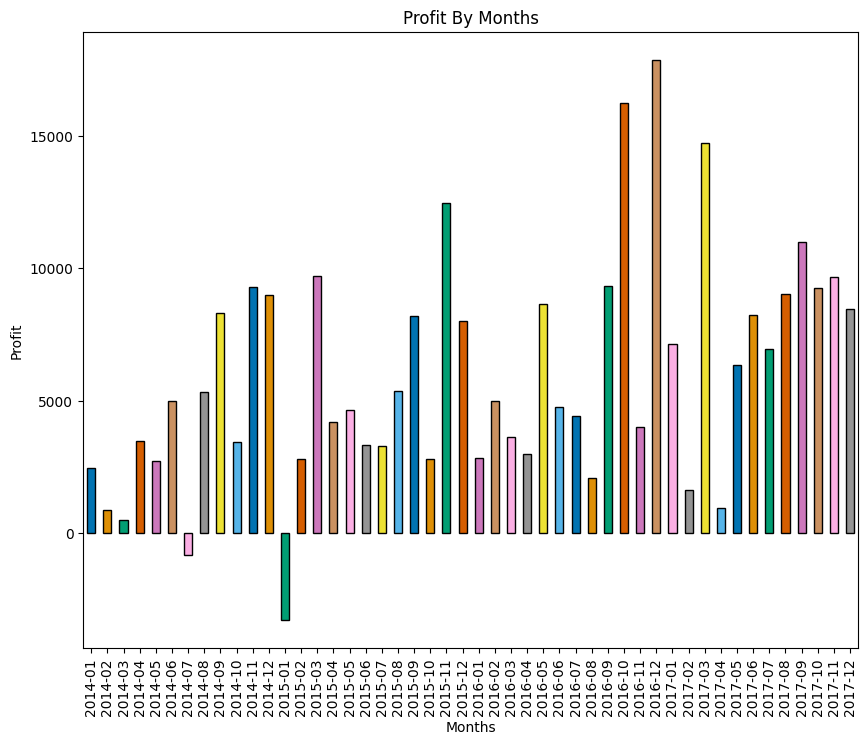

In [25]:
plt.figure(figsize=(10,8))
ax= profit_by_month.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Profit By Months')
plt.xlabel('Months')
plt.ylabel('Profit')
plt.show()


Highest profit was in 11-2016 and loss in  01-2015

Profit by Year

In [26]:
profit_by_year= df.groupby('Year')['Profit'].sum()
print("Profit by Year: \n", profit_by_year)

Profit by Year: 
 Year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64


Visualization

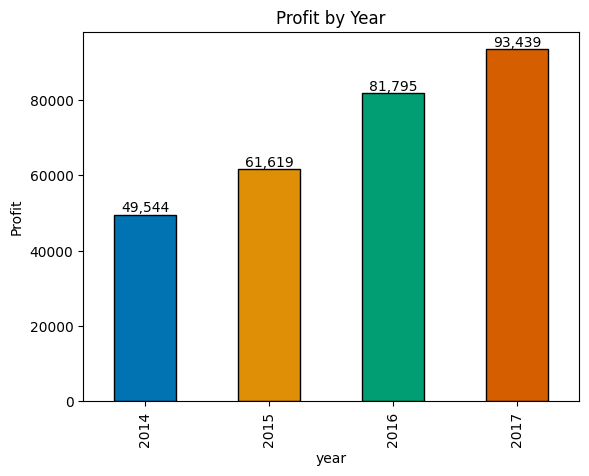

In [27]:
plt.Figure(figsize=(6,4))
ax=profit_by_year.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Profit by Year')
plt.xlabel('year')
plt.ylabel('Profit')
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()

Percentage of Yearly Profit Growth

In [28]:
profit_growth = profit_by_year.pct_change() * 100

print("Year on Year profit Growth:\n", profit_growth)


Year on Year profit Growth:
 Year
2014          NaN
2015    24.371540
2016    32.744284
2017    14.235675
Name: Profit, dtype: float64


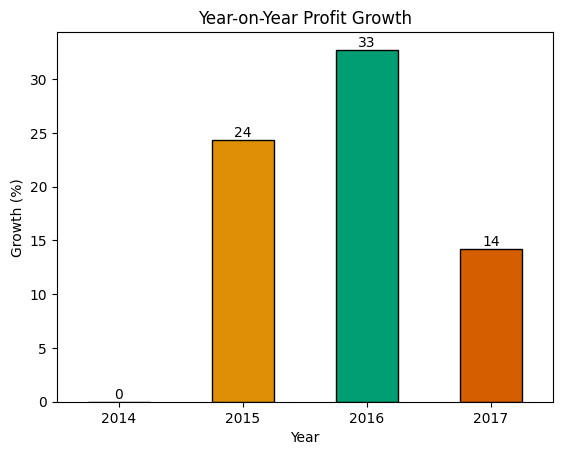

In [29]:
plt.Figure(figsize=(6,4))
ax = profit_growth.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title("Year-on-Year Profit Growth")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()


## Business Insights

Bets Selling category

In [30]:
best_selling_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)
print("Sales by Category:\n", best_selling_category)


Sales by Category:
 Category
Office Supplies    719047.0320
Furniture          741999.7953
Technology         836154.0330
Name: Sales, dtype: float64


Visualization

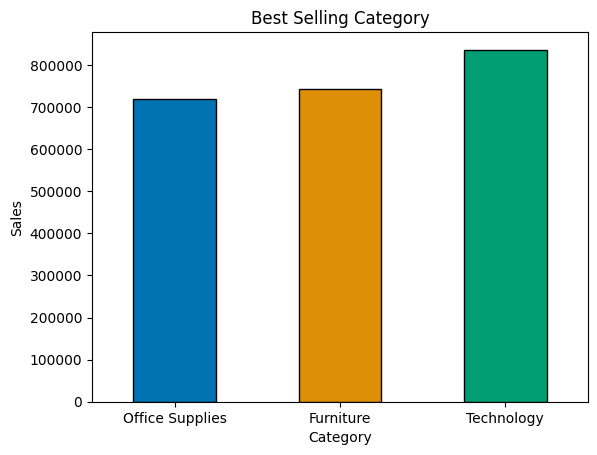

In [31]:
plt.Figure(figsize=(6,10))
best_selling_category.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Best Selling Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

Product with highest sales

In [32]:
highest_selling_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print("HighestSelling Product:\n", highest_selling_product)

HighestSelling Product:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


Visualization

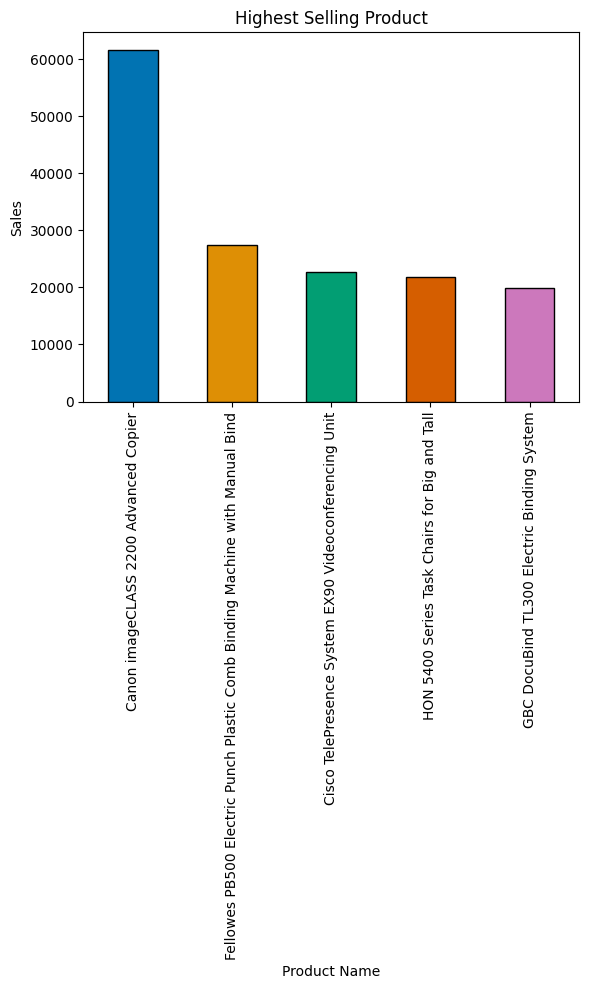

In [33]:
plt.Figure(figsize=(6,4))
highest_selling_product.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Highest Selling Product')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

Product With Highest Profit

In [34]:
highest_profitable_product=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
print("Product With Highest Profit: \n", highest_profitable_product)

Product With Highest Profit: 
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64


Visualization

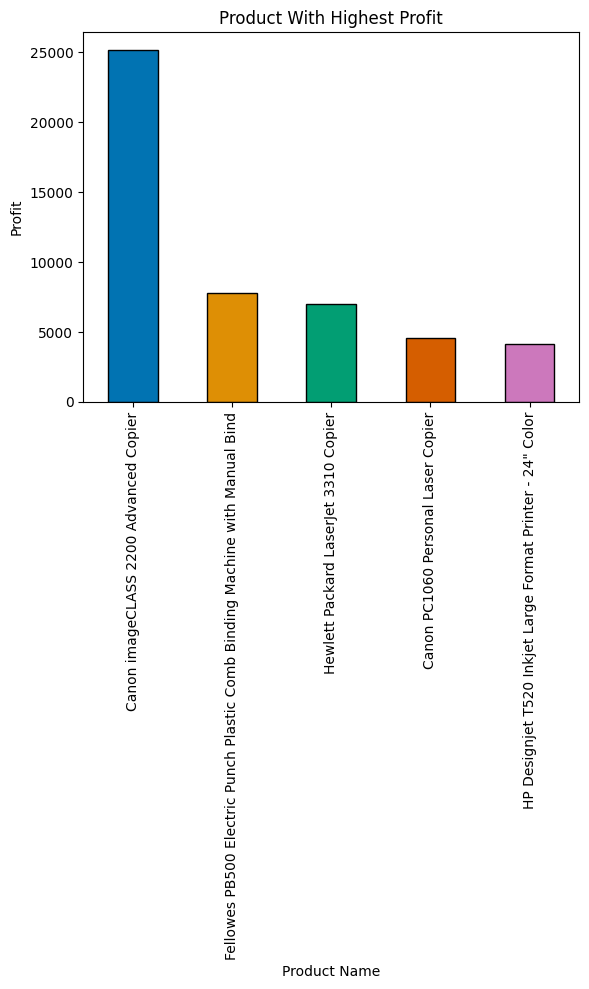

In [35]:
plt.Figure(figsize=(6,4))
highest_profitable_product.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Product With Highest Profit')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.show()

Loss Making Product

In [36]:
loss_making_products = (df.groupby('Product Name')[['Sales', 'Profit']].sum().query("Profit < 0").sort_values(by="Sales", ascending=False)
      .head(5))
print("Loss-Making Products:\n", loss_making_products)


Loss-Making Products:
                                                         Sales     Profit
Product Name                                                            
Cisco TelePresence System EX90 Videoconferencin...  22638.480 -1811.0784
GBC DocuBind P400 Electric Binding System           17965.068 -1878.1662
High Speed Automatic Electric Letter Opener         17030.312  -262.0048
Lexmark MX611dhe Monochrome Laser Printer           16829.901 -4589.9730
Martin Yale Chadless Opener Electric Letter Opener  16656.200 -1299.1836


Visualization

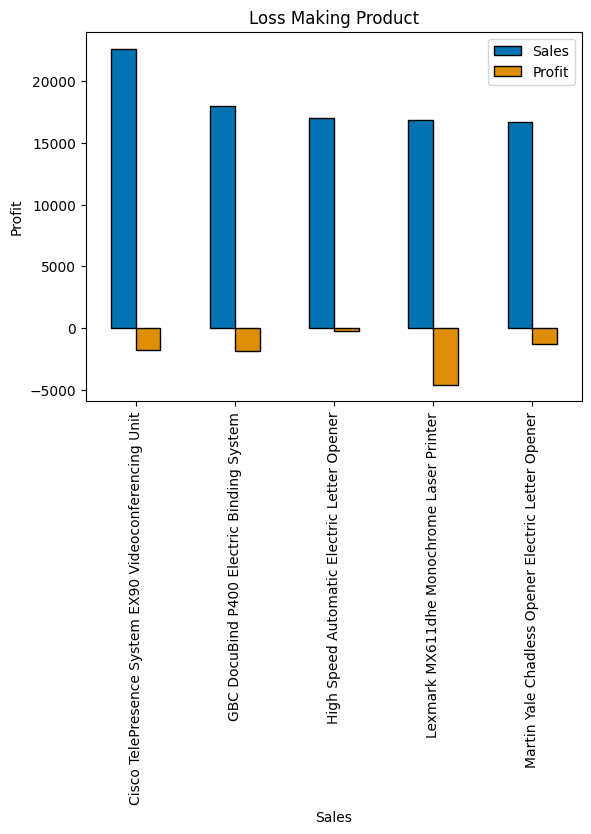

In [37]:
plt.Figure(figsize=(6,4))
loss_making_products.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title('Loss Making Product')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

Customer Segment Distribution

In [54]:
print("Customer Segment Distgribution \n", df['Segment'].value_counts())

Customer Segment Distgribution 
 Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


Visualization

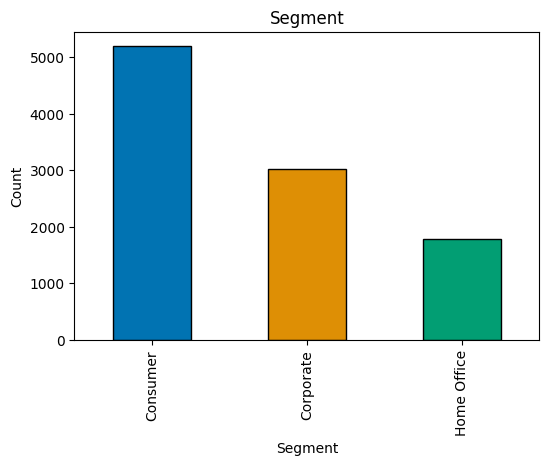

In [55]:
plt.figure(figsize=(6,4))

df['Segment'].value_counts().plot(kind='bar', color=colors_category[:len(df['Segment'].unique())],
edgecolor='black')
plt.title('Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

Segment Category Counts

In [56]:
segment_category_counts = df.groupby(['Segment', 'Category']).size()
print(segment_category_counts)


Segment      Category       
Consumer     Furniture          1113
             Office Supplies    3127
             Technology          951
Corporate    Furniture           646
             Office Supplies    1820
             Technology          554
Home Office  Furniture           362
             Office Supplies    1079
             Technology          342
dtype: int64


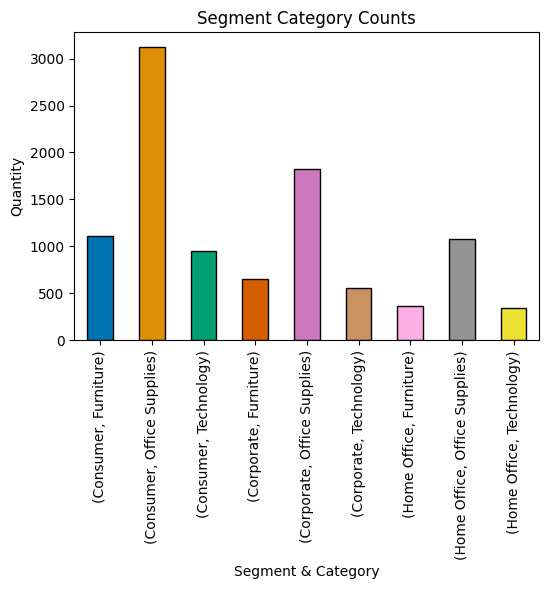

In [58]:
plt.figure(figsize=(6,4))
segment_category_counts.plot(kind='bar', color=colors_category, edgecolor='black')
plt.title("Segment Category Counts")
plt.xlabel("Segment & Category")
plt.ylabel('Quantity')
plt.show()

Customer Segment Profit Ratio

In [38]:
segment_stats = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
segment_stats['Profit Ratio'] = segment_stats['Profit'] / segment_stats['Sales']

print("Customer Segment Analysis:\n", segment_stats)


Customer Segment Analysis:
        Segment         Sales       Profit  Profit Ratio
0     Consumer  1.161401e+06  134119.2092      0.115481
1    Corporate  7.061464e+05   91979.1340      0.130255
2  Home Office  4.296531e+05   60298.6785      0.140343


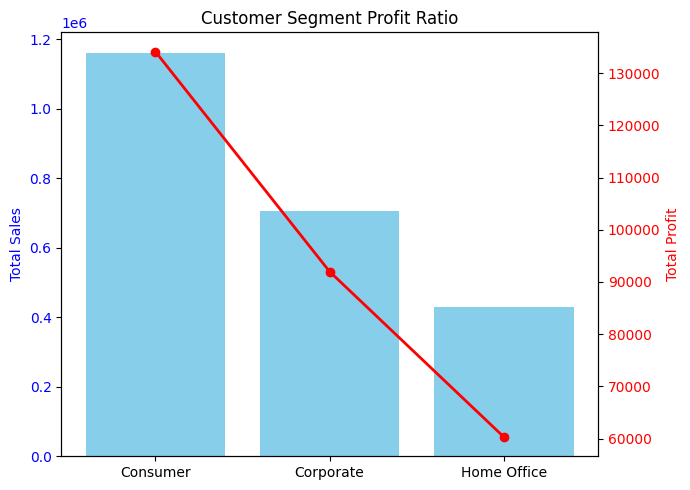

In [39]:
segment_stats = df.groupby('Segment')[['Sales','Profit']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(7,5))

# Bar chart for Sales
ax1.bar(segment_stats['Segment'], segment_stats['Sales'], color='skyblue', label='Sales')
ax1.set_ylabel("Total Sales", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for Profit (secondary axis)
ax2 = ax1.twinx()
ax2.plot(segment_stats['Segment'], segment_stats['Profit'], color='red', marker='o', linewidth=2, label='Profit')
ax2.set_ylabel("Total Profit", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title & Layout
plt.title("Customer Segment Profit Ratio")
fig.tight_layout()
plt.show()


Regional Sales and Profit

In [40]:
region_stats = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_stats['Profit Ratio'] = region_stats['Profit'] / region_stats['Sales']

print("Regional Sales & Profit Analysis:\n", region_stats)


Regional Sales & Profit Analysis:
     Region        Sales       Profit  Profit Ratio
0  Central  501239.8908   39706.3625      0.079216
1     East  678781.2400   91522.7800      0.134834
2    South  391721.9050   46749.4303      0.119343
3     West  725457.8245  108418.4489      0.149448


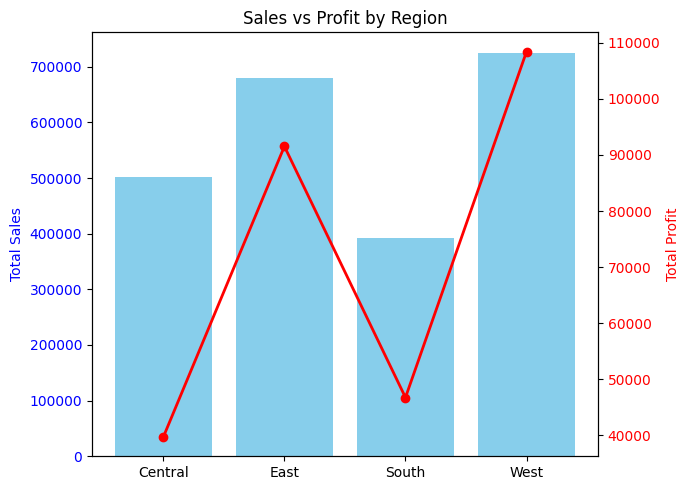

In [41]:

# Prepare data
region_stats = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(7,5))

# Bar chart for Sales
ax1.bar(region_stats['Region'], region_stats['Sales'], color='skyblue', label='Sales')
ax1.set_ylabel("Total Sales", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for Profit (secondary axis)
ax2 = ax1.twinx()
ax2.plot(region_stats['Region'], region_stats['Profit'], color='red', marker='o', linewidth=2, label='Profit')
ax2.set_ylabel("Total Profit", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title & Layout
plt.title("Sales vs Profit by Region")
fig.tight_layout()
plt.show()


Top Customers 

In [64]:
top_customer = df.groupby('Customer Name')['Sales'].sum().reset_index()
top_customer = top_customer.rename(columns={'Sales': 'Spending'})
top_customer = top_customer.sort_values(by='Spending', ascending=False)

print("Top 10 Customers by Lifetime Value: \n", top_customer.head(10))


Top 10 Customers by Lifetime Value: 
           Customer Name   Spending
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


Model Evaluation (Last 12 Months):
RMSE: 16449.7
MAE: 13886.47
MAPE (%): 23.5

Forecast for Next 12 Months:
            PredictedSales
Month                     
2018-01-01    38114.638450
2018-02-01    27269.582041
2018-03-01    52080.688019
2018-04-01    43941.318654
2018-05-01    43881.842985
2018-06-01    51181.274420
2018-07-01    38938.357594
2018-08-01    71253.565133
2018-09-01    72978.481487
2018-10-01    79124.397161
2018-11-01    85614.168149
2018-12-01    86896.376739


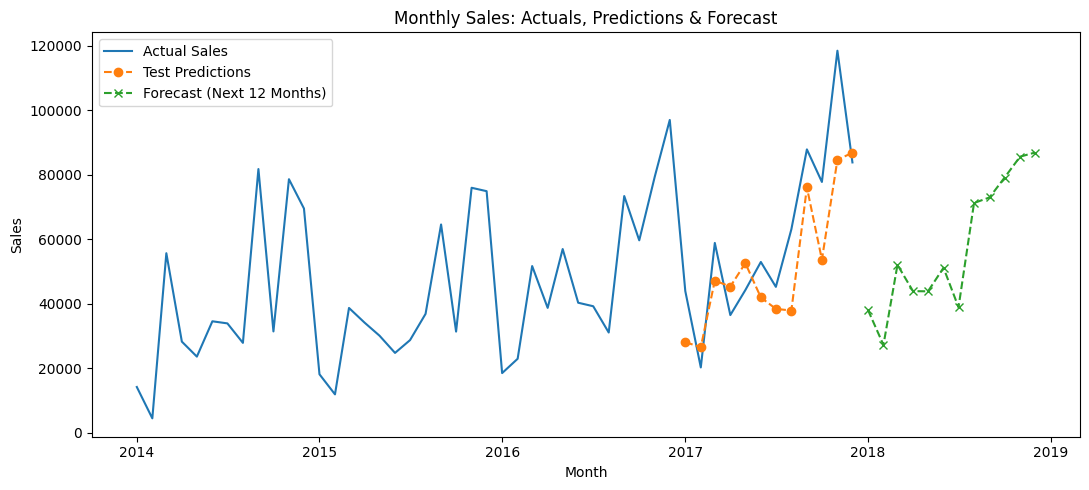

In [52]:
# 📌 Sales Forecasting on Sample Superstore Dataset

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')

# -----------------------------
# 2. Aggregate Monthly Sales
# -----------------------------
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
monthly = df.groupby('Month')['Sales'].sum().reset_index()
monthly = monthly.rename(columns={'Sales': 'TotalSales'})
monthly.set_index('Month', inplace=True)

# Fill missing months with 0
idx = pd.date_range(start=monthly.index.min(), end=monthly.index.max(), freq='MS')
monthly = monthly.reindex(idx, fill_value=0.0)
monthly.index.name = 'Month'

# -----------------------------
# 3. Create Features
# -----------------------------
def create_features(df, lags=[1,2,3,6,12]):
    X = df.copy()
    for lag in lags:
        X[f'lag_{lag}'] = X['TotalSales'].shift(lag)
    X['roll_mean_3'] = X['TotalSales'].shift(1).rolling(window=3).mean()
    X['roll_mean_6'] = X['TotalSales'].shift(1).rolling(window=6).mean()
    X['month'] = X.index.month
    X['month_sin'] = np.sin(2 * np.pi * X['month'] / 12)
    X['month_cos'] = np.cos(2 * np.pi * X['month'] / 12)
    return X.drop(columns=['month'])

features = create_features(monthly)
features = features.dropna()

# Target and Features
y = features['TotalSales']
X = features.drop(columns=['TotalSales'])

# -----------------------------
# 4. Train-Test Split
# -----------------------------
test_size = 12  # last 12 months
X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

# -----------------------------
# 5. Train Model
# -----------------------------
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 6. Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, np.nan))) * 100

print("Model Evaluation (Last 12 Months):")
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("MAPE (%):", round(mape, 2))

# -----------------------------
# 7. Forecast Next 12 Months
# -----------------------------
future_periods = 12
last_known = monthly.copy()
future_index = pd.date_range(start=last_known.index.max() + pd.offsets.MonthBegin(1),
                             periods=future_periods, freq='MS')
work = last_known.copy()
future_preds = []

for d in future_index:
    row = {}
    for lag in [1,2,3,6,12]:
        lag_date = d - pd.DateOffset(months=lag)
        val = work['TotalSales'].get(lag_date, 0.0)
        row[f'lag_{lag}'] = float(0.0 if pd.isna(val) else val)
    roll3_dates = [d - pd.DateOffset(months=i) for i in range(1,4)]
    roll6_dates = [d - pd.DateOffset(months=i) for i in range(1,7)]
    row['roll_mean_3'] = np.mean([work['TotalSales'].get(dt, 0.0) for dt in roll3_dates])
    row['roll_mean_6'] = np.mean([work['TotalSales'].get(dt, 0.0) for dt in roll6_dates])
    m = d.month
    row['month_sin'] = np.sin(2 * np.pi * m / 12)
    row['month_cos'] = np.cos(2 * np.pi * m / 12)
    row_df = pd.DataFrame(row, index=[d])[X_train.columns]
    pred = model.predict(row_df)[0]
    future_preds.append(pred)
    work.loc[d] = pred

forecast_df = pd.DataFrame({'Month': future_index, 'PredictedSales': future_preds}).set_index('Month')

print("\nForecast for Next 12 Months:")
print(forecast_df)

# -----------------------------
# 8. Plot Results
# -----------------------------
plt.figure(figsize=(11,5))
plt.plot(monthly.index, monthly['TotalSales'], label='Actual Sales')
plt.plot(y_test.index, y_pred, label='Test Predictions', linestyle='--', marker='o')
plt.plot(forecast_df.index, forecast_df['PredictedSales'], label='Forecast (Next 12 Months)', linestyle='--', marker='x')
plt.title("Monthly Sales: Actuals, Predictions & Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()
